In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import joblib

from ModelPipeline import create_pipeline

In [2]:
data = pd.read_csv('../Data/Initial Data.csv')

In [3]:
data.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_score,koi_fpflag_nt,...,koi_dicco_mdec,koi_dicco_mdec_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,...,0.200,0.160,0.200,0.170,0.080,0.130,0.310,0.170,0.320,0.160
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,Done,2018-08-16,CANDIDATE,0.969,0,...,0.000,0.480,0.390,0.360,0.490,0.340,0.120,0.730,0.500,0.450
2,3,10811496,K00753.01,NaN,CANDIDATE,Done,2018-08-16,CANDIDATE,0.000,0,...,-0.034,0.070,0.042,0.072,0.002,0.071,-0.027,0.074,0.027,0.074
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0.000,0,...,0.147,0.078,0.289,0.079,-0.257,0.072,0.099,0.077,0.276,0.076
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,...,-0.090,0.180,0.100,0.140,0.070,0.180,0.020,0.160,0.070,0.200


In [4]:
X = data.drop('koi_disposition', axis=1)
y = data['koi_disposition']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
model = create_pipeline(RandomForestClassifier())
model.fit(X_train, y_train)

,steps,"[('dropper', ...), ('preprocessor', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,cols_to_drop,"['rowid', 'kepid', ...]"
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False


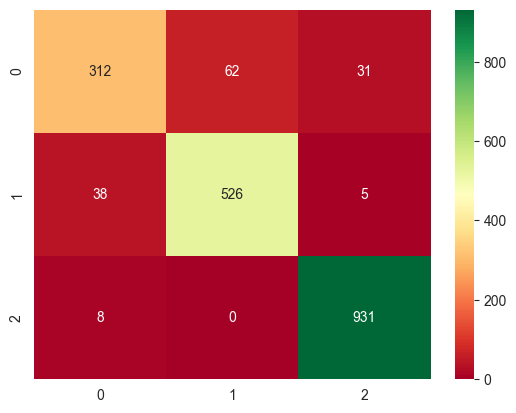

Accuracy:  0.9247255619445897
Classification Report:
                 precision    recall  f1-score   support

     CANDIDATE       0.87      0.77      0.82       405
     CONFIRMED       0.89      0.92      0.91       569
FALSE POSITIVE       0.96      0.99      0.98       939

      accuracy                           0.92      1913
     macro avg       0.91      0.90      0.90      1913
  weighted avg       0.92      0.92      0.92      1913



In [7]:
y_pred_model = model.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred_model), annot=True, fmt="d", cmap="RdYlGn")
plt.show()
print('Accuracy: ', accuracy_score(y_test, y_pred_model))
print('Classification Report:\n', classification_report(y_test, y_pred_model))

In [8]:
joblib.dump(model, '../Trained Models/Random Forest Model.joblib')

['../Trained Models/Random Forest Model.joblib']

In [9]:
params = {
    'n_estimators': [100,500,1000],
    'max_features': ['auto', 'sqrt', 'log2', 5,9,13],
    'max_depth': [10,13,20, None],
    'min_samples_split': [2,8,13,20],
}
grid = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

KeyboardInterrupt: 

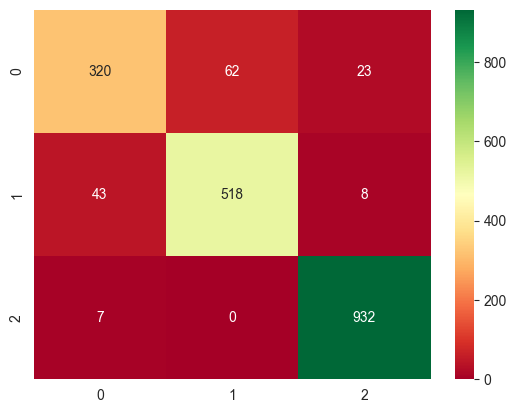

Accuracy:  0.9252483010977522
Classification Report:
                 precision    recall  f1-score   support

     CANDIDATE       0.86      0.79      0.83       405
     CONFIRMED       0.89      0.91      0.90       569
FALSE POSITIVE       0.97      0.99      0.98       939

      accuracy                           0.93      1913
     macro avg       0.91      0.90      0.90      1913
  weighted avg       0.92      0.93      0.92      1913



In [15]:
y_pred_grid = grid.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred_grid), annot=True, fmt="d", cmap="RdYlGn")
plt.show()
print('Accuracy: ', accuracy_score(y_test, y_pred_grid))
print('Classification Report:\n', classification_report(y_test, y_pred_grid))

In [16]:
grid.best_params_

{'max_depth': None,
 'max_features': 13,
 'min_samples_split': 8,
 'n_estimators': 500}

In [18]:
joblib.dump(model, '../RandomForestClassifier.pkl')

['RandomForestClassifier.pkl']